In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.4 MB 4.9 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import MinMaxScaler
plt.style.use('fivethirtyeight')
import yfinance as yf
from sklearn.model_selection import train_test_split

In [ ]:
end_date = '2022-05-28'
df = yf.download('EURUSD=X', start = '2000-01-01', end = end_date)
df.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-05-23,1.056982,1.069027,1.056870,1.056982,1.056982,0
2022-05-24,1.068205,1.074633,1.066200,1.068205,1.068205,0
2022-05-25,1.073653,1.073653,1.064407,1.073653,1.073653,0
2022-05-26,1.068661,1.072869,1.066450,1.068661,1.068661,0
2022-05-27,1.073295,1.076507,1.069805,1.073295,1.073295,0


In [ ]:
#Daily_gain
df['dgain'] = 2*df['Close'] - df['Open']

df.tail()

,Open,High,Low,Close,Adj Close,Volume,dgain
Date,,,,,,,
2022-05-23,1.056982,1.069027,1.056870,1.056982,1.056982,0,1.056982
2022-05-24,1.068205,1.074633,1.066200,1.068205,1.068205,0,1.068205
2022-05-25,1.073653,1.073653,1.064407,1.073653,1.073653,0,1.073653
2022-05-26,1.068661,1.072869,1.066450,1.068661,1.068661,0,1.068661
2022-05-27,1.073295,1.076507,1.069805,1.073295,1.073295,0,1.073295


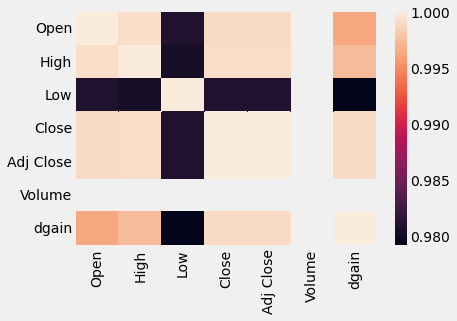

In [ ]:
#Correlation study
import seaborn as sn
sn.heatmap(df.corr())

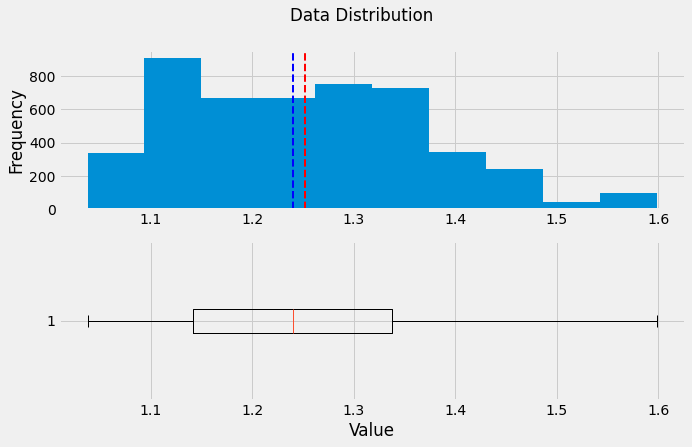

In [ ]:
#Visual EDA

fig, ax = plt.subplots(2,1,figsize = (10,6))
  #histogram
ax[0].hist(df['Close'])
ax[0].set_ylabel('Frequency')
  #plot axes
ax[0].axvline(x = df['Close'].mean(), color = 'red', linestyle = '--', linewidth = 2)
ax[0].axvline(x = df['Close'].median(), color = 'blue', linestyle = '--', linewidth = 2)
  #Box Plot
ax[1].boxplot(df['Close'], vert = False)
ax[1].set_xlabel('Value')
  #Plot Title
fig.suptitle('Data Distribution')
  #Plot the figure
plt.show()


In [ ]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'dgain'], dtype='object')

In [ ]:
X = df[['Open', 'High', 'Low', 'Adj Close', 'dgain']]
print(X.head())
Y = df[['Close']]

                Open      High       Low  Adj Close     dgain
Date                                                         
2003-12-01  1.203398  1.204007  1.194401   1.196501  1.189604
2003-12-02  1.196101  1.210903  1.194600   1.208897  1.221694
2003-12-03  1.209000  1.213003  1.207700   1.212298  1.215595
2003-12-04  1.212004  1.214403  1.204398   1.208094  1.204185
2003-12-05  1.207802  1.219096  1.206593   1.218695  1.229587


In [ ]:
scaler_x = MinMaxScaler(feature_range = (0,1))
scaler_y = MinMaxScaler(feature_range = (0,1))

In [ ]:
X_nor = scaler_x.fit_transform(X[:-1])
Y_nor = scaler_y.fit_transform(Y[1:])
print(X_nor)
print(Y_nor)

[[0.29530958 0.28895307 0.74050733 0.28268905 0.26361362]
 [0.28228336 0.30124822 0.74063917 0.3047918  0.31939684]
 [0.30530805 0.30499294 0.74928891 0.31085429 0.3087949 ]
 ...
 [0.05399021 0.05829255 0.65585874 0.05393116 0.05257928]
 [0.06371418 0.05654378 0.65467476 0.0636445  0.06204914]
 [0.05480518 0.0551474  0.65602388 0.05474525 0.05337296]]
[[0.3047918 ]
 [0.31085429]
 [0.3033596 ]
 ...
 [0.0636445 ]
 [0.05474525]
 [0.06300769]]


In [ ]:
train_len = math.ceil(len(X_nor)*0.8)
train_len

3836

In [ ]:
X_train = X_nor[:train_len]
X_test = X_nor[train_len:]
Y_train = Y_nor[:train_len]
Y_test = Y_nor[train_len:]
print('Lengh of train dataset of features', len(X_train))
print('Lengh of test dataset of features', len(X_test))
print('Lengh of train dataset of labels', len(Y_train))
print('Lengh of test dataset of labels', len(Y_test))


Lengh of train dataset of features 3836
Lengh of test dataset of features 959
Lengh of train dataset of labels 3836
Lengh of test dataset of labels 959


#Regression

##LinearRegression

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [ ]:
lr.fit(X_train, Y_train)


LinearRegression()

In [ ]:
lr.score(X_test, Y_test)

0.9922993637152661

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, y_pred)
rmse = np.sqrt(mse)
print(f'The MSE is: {mse}')
print(f'The RMSE is: {rmse}')

The MSE is: 4.136873546069339e-05
The RMSE is: 0.006431853190231676


In [ ]:
y_pred = scaler_y.inverse_transform(y_pred)

In [ ]:
y_pred = np.array(y_pred)
#y_pred  = np.reshape(y_pred, (-1,1))
Y_test = np.array(Y_test)
#X_test = np.reshape(X_test, (-1,1))

In [ ]:
Y_test = scaler_y.inverse_transform(Y_test)
Ytest = Y_test.tolist()
yt = []
for x in Ytest:
  yt.append(x[0])
len(yt)


959

In [ ]:
Ypred = y_pred.tolist()
yp = []
for x in Ypred:
  yp.append(x[0])
len(yp)

959

In [ ]:
results = pd.DataFrame({'Real': yt,'Predicted':yp})


In [ ]:
results.set_index(X[train_len+1:].index, inplace = True)
results.tail()

,Real,Predicted
Date,,
2022-05-23,1.056982,1.057401
2022-05-24,1.068205,1.063241
2022-05-25,1.073653,1.070588
2022-05-26,1.068661,1.071572
2022-05-27,1.073295,1.069501


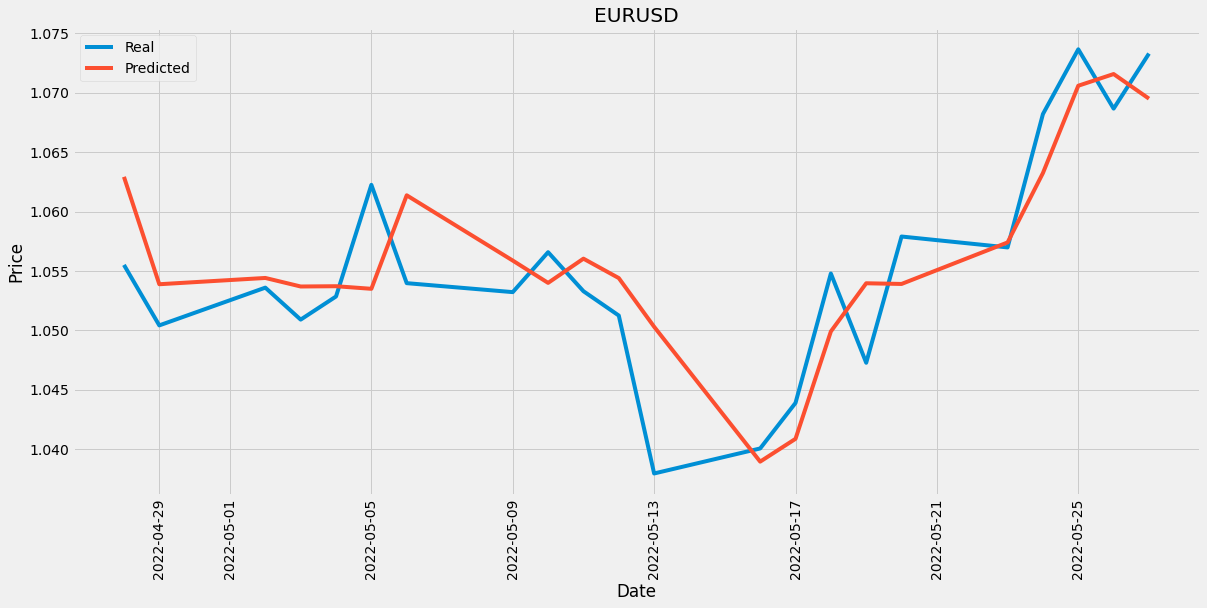

In [ ]:
#Plot resuls
plt.figure(figsize = (18,8))
plt.plot(results[-22:])
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation =90)
plt.title('EURUSD')
plt.legend(results)
plt.show()